<a href="https://colab.research.google.com/github/gracespalding/Data-Science/blob/main/Grace_Spaldin_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path #A python module that wraps the pdftoppm and pdftocairo utilities to convert PDF into images.
import matplotlib.pyplot as plt #A comprehensive library used for creating static, animated, and interactive visuals within Python.
import numpy as np #Fundamnetal package of scientific computng in Python.
import torch #An open source machine learning (ML) framework based on the Python programming language and the Torch library.
import requests #A HTTP library for the Python programming language. 
from torchvision import * #Consists of popular datasets, model architectures, and common image transformations for computer vision. 
from torchvision.models import * #Contains definitions of models for addressing different tasks.
from flashtorch.utils import apply_transforms #Represents a Python iterable over a datase. 
import wandb as wb #A python package that allows us to monitor our training in real-time. 

In [4]:
def GPU(data): #GPU computing is the use of a graphics processing unit to perform highly parallel independent calculations that were once handled by the CPU.
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda')) # a multi-dimensional matrix containing elements of a single data type.

def plot(x): #Defing a plot with certain specifications.
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5) #Size of the figure in plot.
    plt.show()
    
def get_google_slide(url): #This allows Python to recieve the data from the Google Slide URL
    url_head = "https://docs.google.com/presentation/d/" #URL
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): #Allows Python to access the data in the google slides.
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content) 
    images = convert_from_path('file.pdf', 500) #Convert the images on the slides.
    return images

def load(image): #This will load the images on the google slides into Python to be used as data.

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #Enables you to specify the device type responsible to load a tensor into memory. 

In [5]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}
#A download for specific labels.

model = alexnet(weights='DEFAULT').to(device) 
model.eval();

In [6]:
url = "https://docs.google.com/presentation/d/1MNY92nIlb2J9yWoXabJOT4v5_QbTMuBrNcISr6jXZIo/edit?pli=1#slide=id.p" #URL for google slides with images.

https://docs.google.com/presentation/d/1QC2xIcVhTm_52DgxqjEqur72jlLKnc4NRO-csmaJhDI/edit?usp=sharing


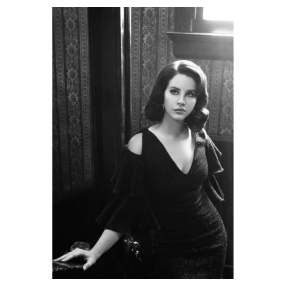

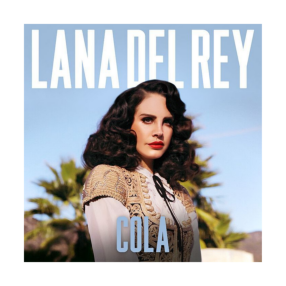

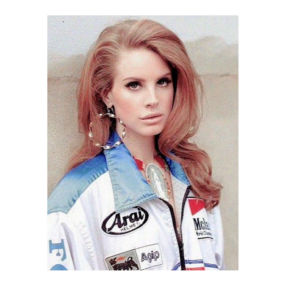

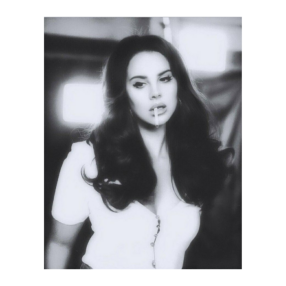

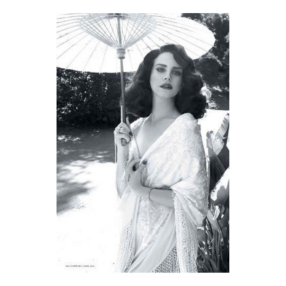

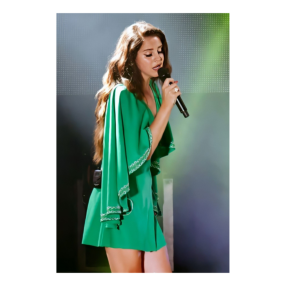

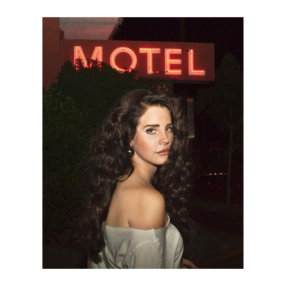

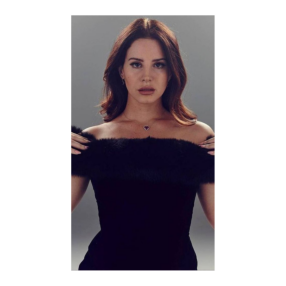

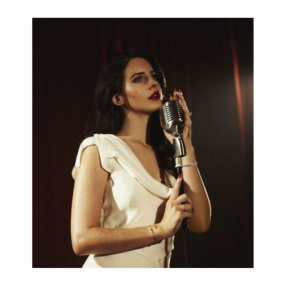

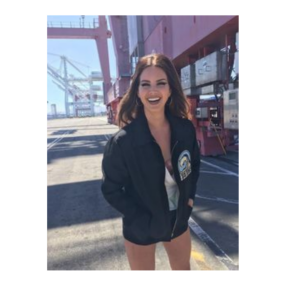

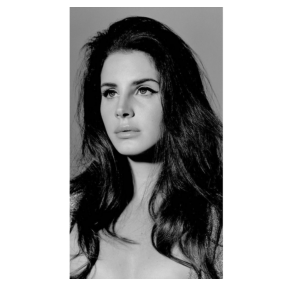

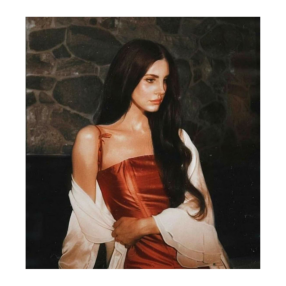

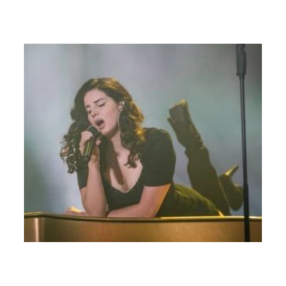

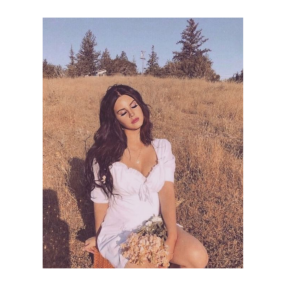

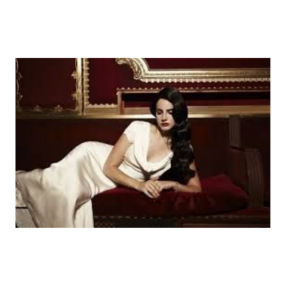

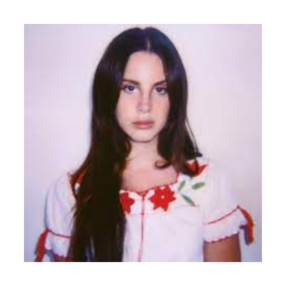

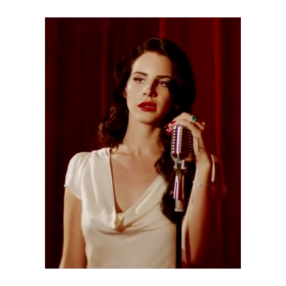

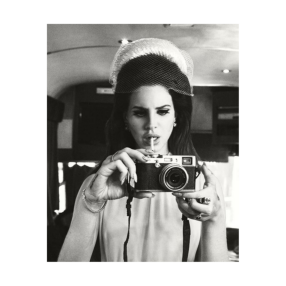

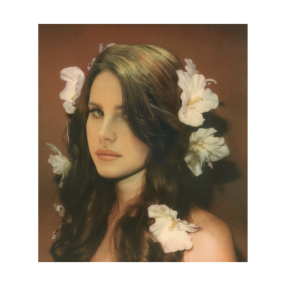

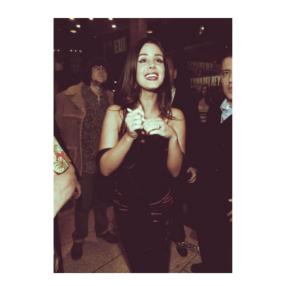

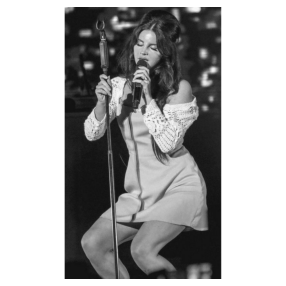

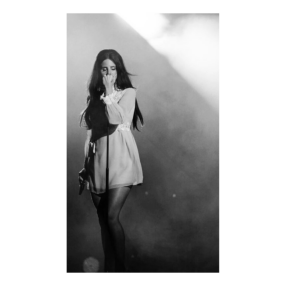

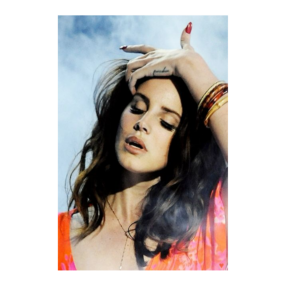

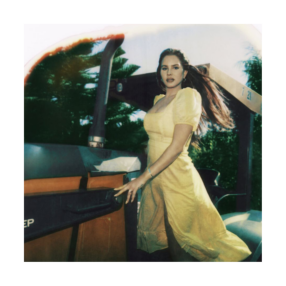

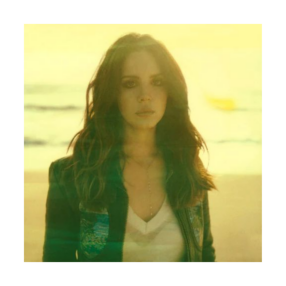

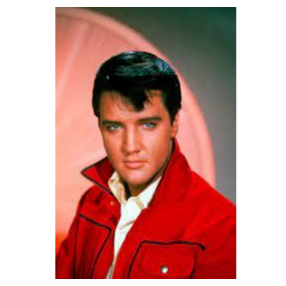

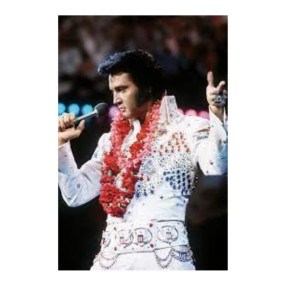

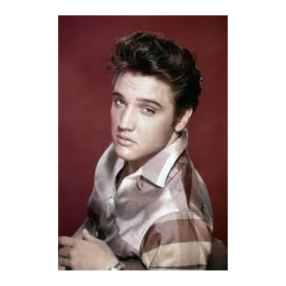

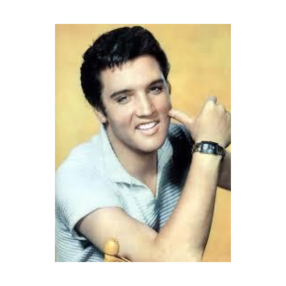

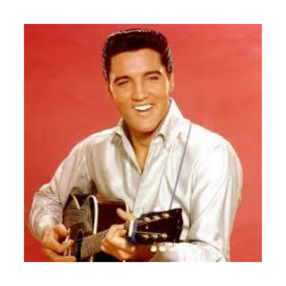

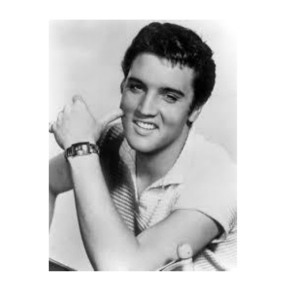

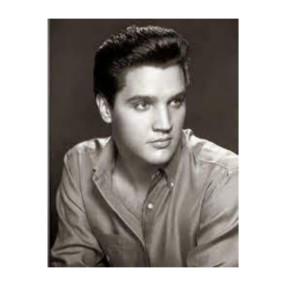

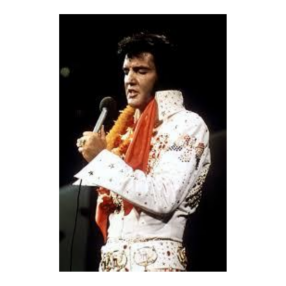

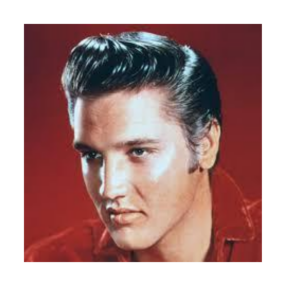

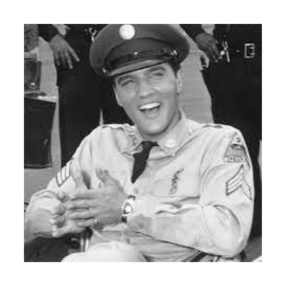

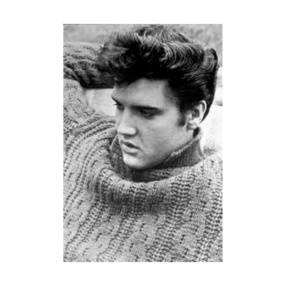

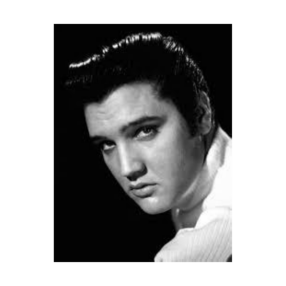

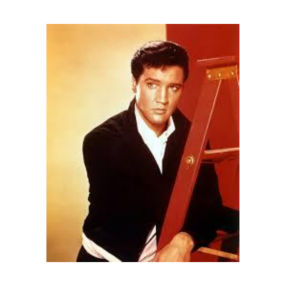

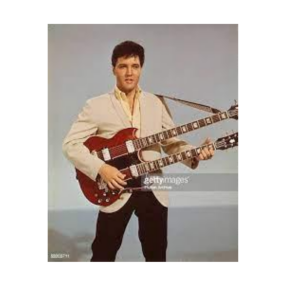

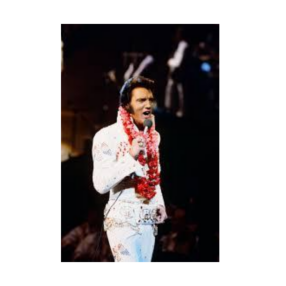

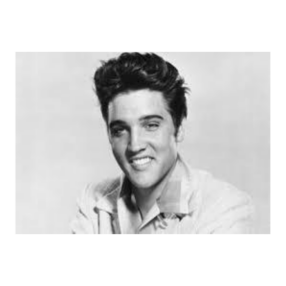

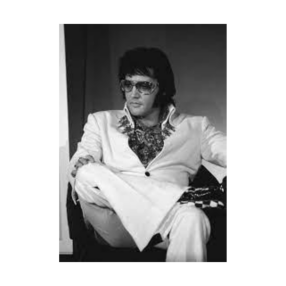

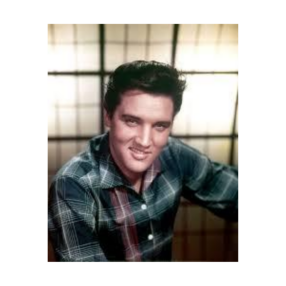

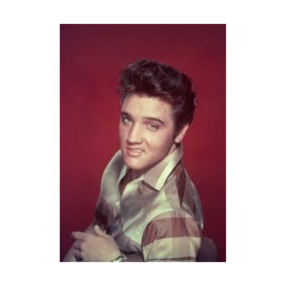

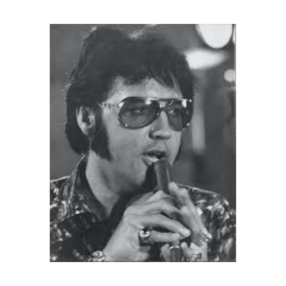

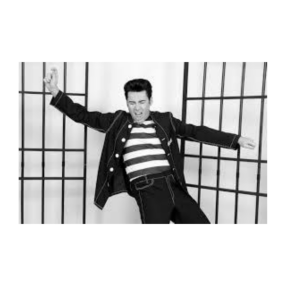

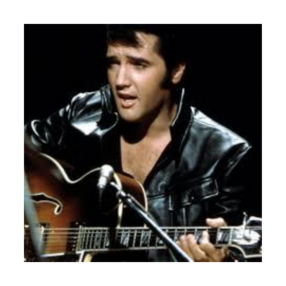

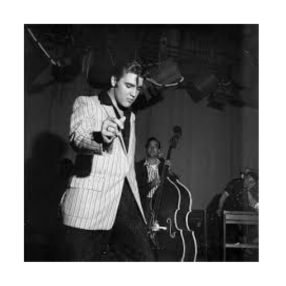

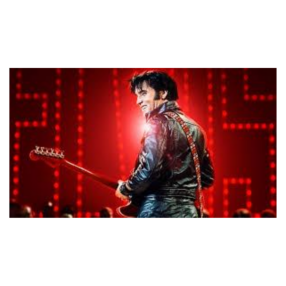

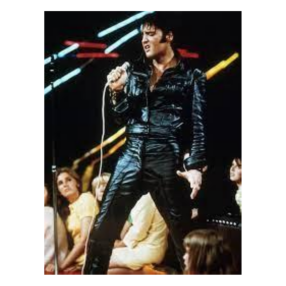

In [7]:
images = [] #This code allows for the 

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [8]:
images.shape #Describes the shape of the images.

torch.Size([50, 3, 224, 224])

In [9]:
model(images) #defines a new kind of datastore entity and the properties the kind is expected to take.

tensor([[-2.5457, -4.6825, -2.3901,  ..., -4.7206,  0.2246,  2.2151],
        [ 3.9260, -4.4086, -0.7992,  ..., -1.0248,  2.4542,  0.9700],
        [ 0.8499, -3.1171, -0.4491,  ..., -4.5970, -0.7839,  4.1783],
        ...,
        [-2.9960, -3.9314, -3.7042,  ..., -4.7935,  2.1034,  1.6755],
        [-2.9389, -3.0594, -1.3106,  ..., -3.8435, -0.2721, -0.7291],
        [-2.6581, -3.6485, -0.5010,  ..., -5.1482,  0.0383, -1.1312]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [10]:
y = model(images) #Defining y, equivalent to the model images data above.

In [12]:
y.shape #Defines shape of the data.

torch.Size([50, 1000])

In [13]:
guesses = torch.argmax(y, 1).cpu().numpy() #Defining guess. torch.argmax returns the indices of the maximum value of all elements in the input tensor. 

In [14]:
for i in list(guesses): #Creates a list based on the data from above.
    print(labels[i])

bow tie, bow-tie, bowtie
book jacket, dust cover, dust jacket, dust wrapper
pajama, pyjama, pj's, jammies
maillot, tank suit
lab coat, laboratory coat
trench coat
book jacket, dust cover, dust jacket, dust wrapper
miniskirt, mini
maillot
horizontal bar, high bar
wig
overskirt
television, television system
fur coat
web site, website, internet site, site
apron
brassiere, bra, bandeau
bow tie, bow-tie, bowtie
mask
abaya
oboe, hautboy, hautbois
abaya
hair spray
overskirt
miniskirt, mini
Windsor tie
kimono
trench coat
dumbbell
lab coat, laboratory coat
stethoscope
academic gown, academic robe, judge's robe
overskirt
suit, suit of clothes
lab coat, laboratory coat
chain mail, ring mail, mail, chain armor, chain armour, ring armor, ring armour
academic gown, academic robe, judge's robe
academic gown, academic robe, judge's robe
violin, fiddle
abaya
web site, website, internet site, site
lab coat, laboratory coat
bulletproof vest
book jacket, dust cover, dust jacket, dust wrapper
military unif

In [15]:
Y = np.zeros(50,) #Defining Y, np.zeros creates a new array of given shapes and types filled with zero values. 
Y[25:] = 1

In [16]:
Y #Data from the code above in array form.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [17]:
X = y.detach().cpu().numpy() #Defining X.

In [18]:
X.shape #Shape of the data.

(50, 1000)

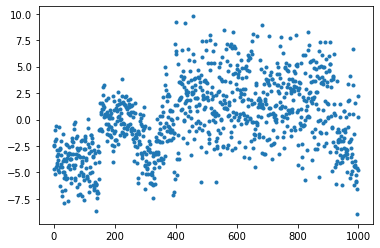

In [19]:
plt.plot(X[0],'.') #Scatter plot with data from from X.

In [20]:
X[0] #Data that is displayed in the plot above.

array([-2.54569960e+00, -4.68252420e+00, -2.39014602e+00, -9.76123691e-01,
       -2.01500392e+00, -5.10617542e+00, -4.46501589e+00, -6.03118718e-01,
       -1.80655503e+00, -4.26443291e+00, -2.91961432e+00, -4.06038284e+00,
       -3.47718644e+00, -3.24394369e+00, -3.83800077e+00, -4.73117828e+00,
       -4.93726301e+00, -2.88694000e+00, -6.85161293e-01, -2.70416689e+00,
       -6.31645679e+00, -2.82230902e+00, -4.44261837e+00, -2.01591468e+00,
       -3.33096290e+00, -4.21111727e+00, -7.21195936e+00, -6.78843164e+00,
       -4.43719864e+00, -1.32553244e+00, -4.99359035e+00, -3.91021013e+00,
       -3.74616957e+00, -4.91376972e+00, -5.53221703e+00, -7.91380596e+00,
       -3.02688241e+00, -6.62546253e+00, -5.24707317e+00, -3.93678308e+00,
       -2.32806230e+00, -5.63709259e+00, -5.49789953e+00, -2.37351489e+00,
       -3.66214538e+00, -3.33598089e+00, -4.45878220e+00, -7.70728874e+00,
       -3.24458385e+00, -4.27084875e+00, -2.58598018e+00, -3.13445473e+00,
       -4.64524937e+00, -

In [21]:
np.argmax(X[0]) #Returns indices of the max element of the array in a particular axis.

457

In [22]:
labels[948] #Label number 948 defined.

'Granny Smith'

In [23]:
top_ten = np.argsort(X[0])[::-1][0:10] #Top ten of the data set.

In [24]:
for i in top_ten: #A data set of the top ten labels.
    print(labels[i])

bow tie, bow-tie, bowtie
academic gown, academic robe, judge's robe
bassoon
oboe, hautboy, hautbois
flute, transverse flute
hand blower, blow dryer, blow drier, hair dryer, hair drier
suit, suit of clothes
miniskirt, mini
shower curtain
corkscrew, bottle screw


In [25]:
labels #All labels are displayed.

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 11.,  59., 111., 176., 193., 192., 132.,  75.,  39.,  12.]),
 array([-8.914593 , -7.0472813, -5.1799703, -3.3126588, -1.4453475,
         0.4219637,  2.289275 ,  4.156586 ,  6.0238976,  7.8912086,
         9.75852  ], dtype=float32),
 <a list of 10 Patch objects>)

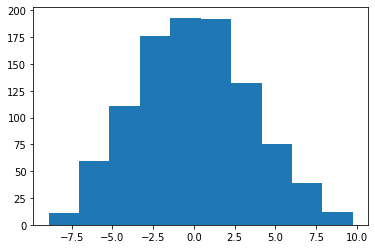

In [26]:
plt.hist(X[0]) #A histogram with the data from X.

In [27]:
X = GPU_data(X) #Definig X and Y with Graphics Processing Unit
Y = GPU_data(Y) #A specialized processor originally designed to accelerate graphics rendering.

In [28]:
def softmax(x): #Converts a vector of numbers into a vector of probabilities
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [29]:
def cross_entropy(outputs, labels): #Measures the performance of a classification model based on the probability and error.        
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [30]:
def randn_trunc(s): #Truncated Normal Random Numbers.
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [31]:
def Truncated_Normal(size): #Truncated Normal Numbers.

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [32]:
def acc(out,y): #A directory in which you have permission to install Python packages using the Python package manager.
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [33]:
X.shape #Using data from X to find shape.

torch.Size([50, 1000])

In [34]:
def get_batch(mode): #A batch can contain several runs of computations. 
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [35]:
def model(x,w): #Defining model from x and w data.

    return x@w[0]

In [36]:
def make_plots(): #Making plots from the batch data and acc model.
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [39]:
wb.init(project="Linear_Model_Photo_1"); #This is the test that will run all of our data. We can run the data as many times as we want to find the best, worst, and average of the runs.
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h) #Optimizer is selecting the best option among a number of possible choices that are feasible or don't violate constraints.

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y) #This code will determine the loss.

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


<ipython-input-4-d379b226d967>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

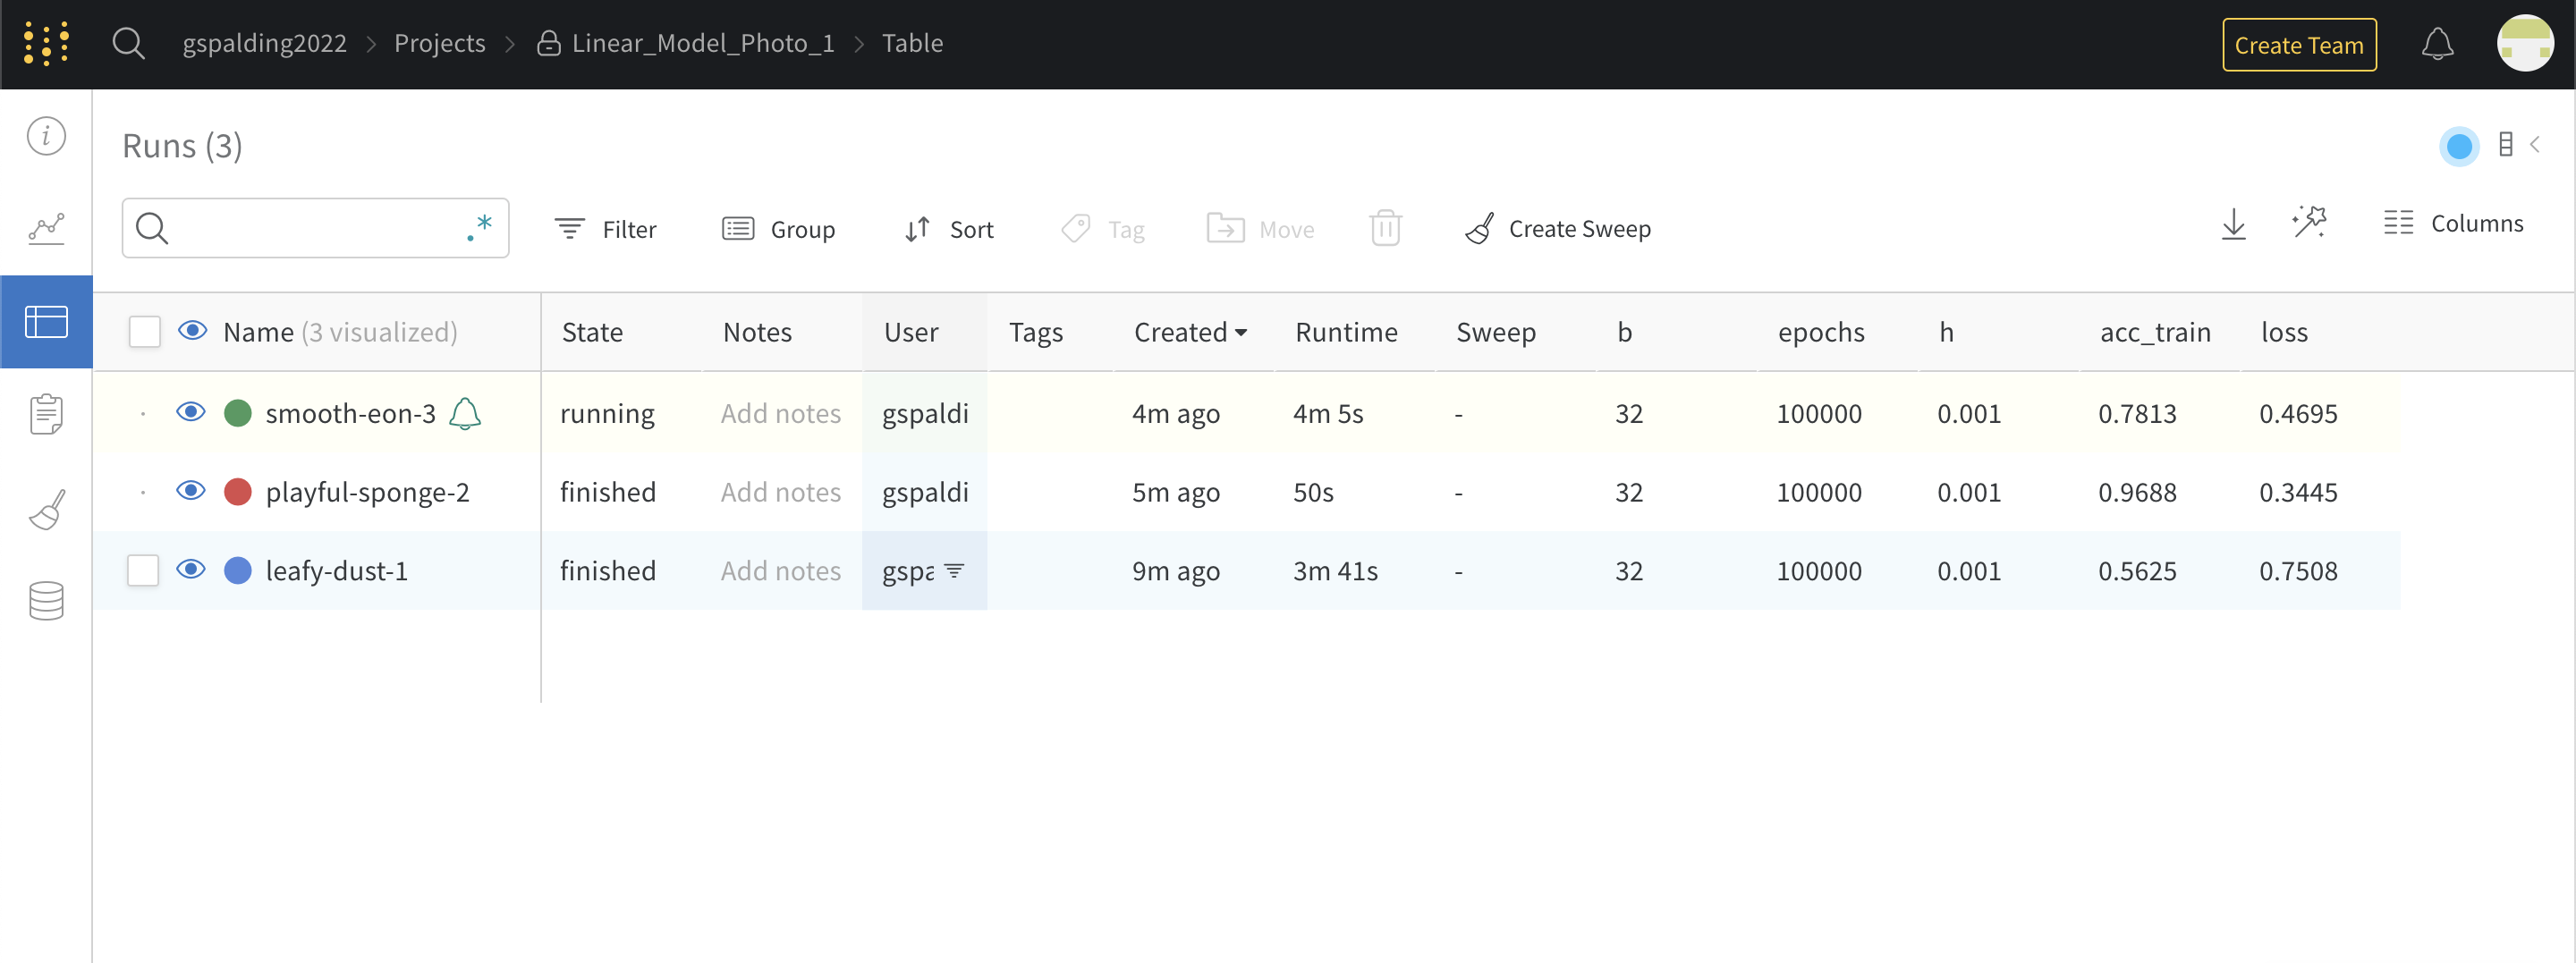